Importing of libraries


In [81]:
import pandas as pd
import numpy as np 
import tensorflow as tf
from matplotlib import pyplot as plt

reading the Data

In [50]:
 df=pd.read_csv('Twitter_Data.csv')

printing of data frame

In [51]:
df.head()

,clean_text,category
0,when modi promised “minimum government maximum...,-1.0
1,talk all the nonsense and continue all the dra...,0.0
2,what did just say vote for modi welcome bjp t...,1.0
3,asking his supporters prefix chowkidar their n...,1.0
4,answer who among these the most powerful world...,1.0


verifying the values of category

In [52]:
df['category'].value_counts()

 1.0    72250
 0.0    55213
-1.0    35510
Name: category, dtype: int64

above values indicates 1 is for positive 0 is for neutral -1 is for negtive

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 162980 entries, 0 to 162979
Data columns (total 2 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   clean_text  162976 non-null  object 
 1   category    162973 non-null  float64
dtypes: float64(1), object(1)
memory usage: 2.5+ MB


in real time we have fill this null values with help of bi team but here i am droping the rows

In [54]:
df.dropna(inplace=True)

In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 162969 entries, 0 to 162979
Data columns (total 2 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   clean_text  162969 non-null  object 
 1   category    162969 non-null  float64
dtypes: float64(1), object(1)
memory usage: 3.7+ MB


Preprocessing the data

In [56]:
#define function to remove unwanted text from tweets
import re
def text_cleaning(text):
  text=re.sub(r'@[A-Za-z0-9]+','',text)      #removing@mentions
  text=re.sub(r'@[A-Za-zA-Z0-9]+','',text)
  text=re.sub(r'@[A-Za-z]+','',text)
  text=re.sub(r'@[-)]+','',text)
  text=re.sub(r'#','',text)                  #removing # sign
  text=re.sub(r'RT[\s]+','',text)            #removing RT
  text=re.sub(r'https?\/\/\s+','',text)      # removing hyperlink
  text=re.sub(r'&[a-z;]+','',text)           # removing &gt
  return text

In [57]:
#applying text cleaning for clean_text
df['clean_text']=df['clean_text'].apply(text_cleaning)

In [58]:
df.head()

,clean_text,category
0,when modi promised “minimum government maximum...,-1.0
1,talk all the nonsense and continue all the dra...,0.0
2,what did just say vote for modi welcome bjp t...,1.0
3,asking his supporters prefix chowkidar their n...,1.0
4,answer who among these the most powerful world...,1.0


In [70]:
#spliting data into traing and testing
from sklearn.model_selection import train_test_split
x=df['clean_text']
y=df['category']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.1)

In [71]:
#converting strings inti integers using tokenizer
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [72]:
#instantiating the tokenizer
max_vocab=20000000
tokenizer=Tokenizer(num_words=max_vocab)
tokenizer.fit_on_texts(x_train)

In [73]:
#checking the word index
word_index=tokenizer.word_index
index_length=len(word_index)
index_length

106302

In [74]:
#converting train test data into sequence
train_seq=tokenizer.texts_to_sequences(x_train)
test_seq=tokenizer.texts_to_sequences(x_test)

In [75]:
#padding the sequences because we need to have same length
#padding train_sequence and test sequency
pad_train=pad_sequences(train_seq)
T=pad_train.shape[1]
T

52

In [76]:
pad_test=pad_sequences(test_seq,maxlen=T)
len(pad_test[1])

52

In [77]:
from tensorflow.keras.layers import Input,Embedding,LSTM,GlobalMaxPool1D,Dense
from tensorflow.keras.models import Model

In [78]:
#model building
D=20 #embedding layer
M=15 #LSTM layer
v=51
i=Input(shape=(T,))
x=Embedding(index_length+1,D)(i)
x=LSTM(M,return_sequences=True)(x)
x=GlobalMaxPool1D()(x)
x=Dense(32,activation='relu')(x)
x=Dense(1,activation='sigmoid')(x)
model=Model(i,x)

In [79]:
#compiling the model
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [80]:
#model_fitting
fitted_model=model.fit(pad_train,y_train,validation_data=(pad_test,y_test),epochs=10)

Epoch 1/10
4584/4584 [==============================] - 203s 44ms/step - loss: -289.9624 - accuracy: 0.6376 - val_loss: -940.7665 - val_accuracy: 0.6905
Epoch 2/10
4584/4584 [==============================] - 198s 43ms/step - loss: -2186.6079 - accuracy: 0.6974 - val_loss: -3594.3257 - val_accuracy: 0.7182
Epoch 3/10
4584/4584 [==============================] - 197s 43ms/step - loss: -5832.8970 - accuracy: 0.7041 - val_loss: -7708.8208 - val_accuracy: 0.6962
Epoch 4/10
4584/4584 [==============================] - 197s 43ms/step - loss: -11201.7764 - accuracy: 0.7110 - val_loss: -13012.0107 - val_accuracy: 0.6898
Epoch 5/10
4584/4584 [==============================] - 197s 43ms/step - loss: -18272.7480 - accuracy: 0.7116 - val_loss: -19998.8125 - val_accuracy: 0.7001
Epoch 6/10
4584/4584 [==============================] - 193s 42ms/step - loss: -27321.4043 - accuracy: 0.7097 - val_loss: -28057.1289 - val_accuracy: 0.6806
Epoch 7/10
4584/4584 [==============================] - 192s 42ms/

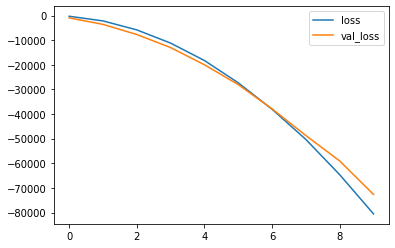

In [82]:
#Evaluating the model
#ploting loss and val_loss of the model
plt.plot(fitted_model.history['loss'],label='loss')
plt.plot(fitted_model.history['val_loss'],label='val_loss')
plt.legend()

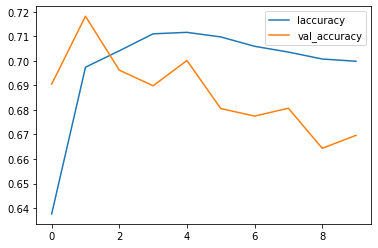

In [83]:
#ploting accuracy and val_accuracy of the model
plt.plot(fitted_model.history['accuracy'],label='laccuracy')
plt.plot(fitted_model.history['val_accuracy'],label='val_accuracy')
plt.legend()

In [84]:
#predicting the sentiment of any text
def predict_sentiment(text):
  #preprocessing given text
  text_seq=tokenizer.texts_to_sequences(text)
  text_pad=pad_sequences(text_seq,maxlen=T)
  #predicting the class
  predict_sentiment=model.predict(text_pad).round()

  if predict_sentiment==1.0:
    return(print('it is a positive sentiment'))
  elif predict_sentiment==0:
    return(print('it is a neutral sentiment'))
  else:
    return(print('it is a negtive sentiment'))


In [85]:
text=['i feel happy']
predict_sentiment(text)

it is a positive sentiment


In [90]:
 #saving model for future purpose
 model.save(r'C:\Users\abhi\Documents\nlp','sentiment_analysis.h5')

INFO:tensorflow:Assets written to: C:\Users\abhi\Documents\nlp/assets


INFO:tensorflow:Assets written to: C:\Users\abhi\Documents\nlp/assets
